# Lab 4 Data Analysis
Group: IP-91

Var: 6

Students:
- Geleshko D.
- Vlasov A.

## Import

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Config

In [14]:
np.random.seed(6)

plt.rcParams["figure.figsize"] = (16, 8)
# pd.set_option("display.max_columns", None)
pd.options.display.float_format ="{:,.3f}".format

# Reading data from .csv file

In [15]:
df = pd.read_csv("../data/bike.csv")
df.columns = df.columns.map(lambda x: str.lower(x))
df.set_index("id", inplace=True)
df

,marital status,gender,income,children,education,occupation,home owner,cars,commute distance,region,age,purchased bike
id,,,,,,,,,,,,
12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes


# Task 1: bar chart

## Customers by occupation

<AxesSubplot:xlabel='occupation', ylabel='count'>

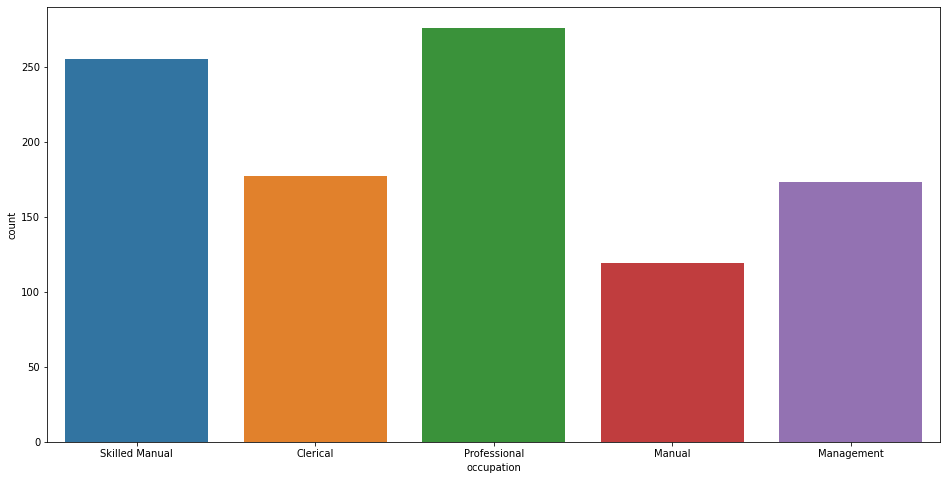

In [16]:
sns.countplot(data=df, x="occupation")

## Mean income by occupation

<AxesSubplot:xlabel='occupation', ylabel='income'>

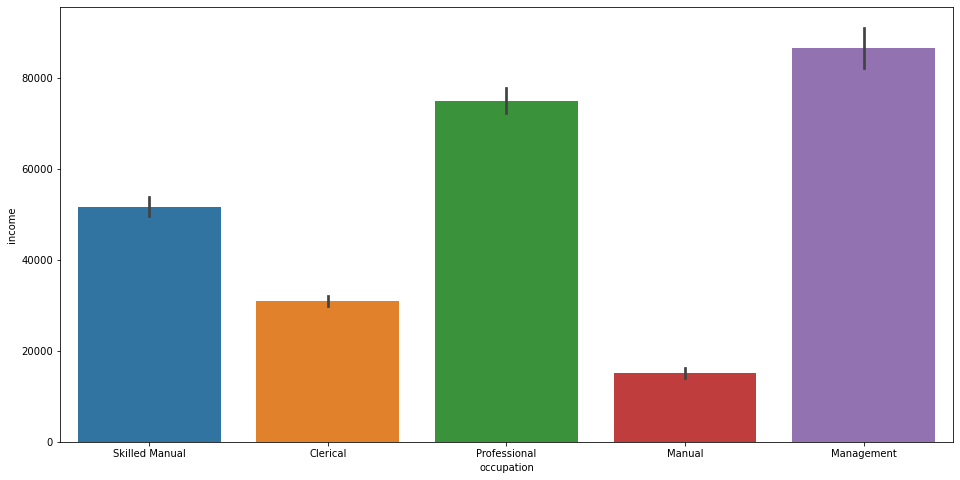

In [17]:
# temp = df.pivot_table(index="occupation", values="income", aggfunc=np.mean)
sns.barplot(data=df, x="occupation", y="income")

## Mean age of customers by occupation by purchase decision

<AxesSubplot:xlabel='occupation', ylabel='age'>

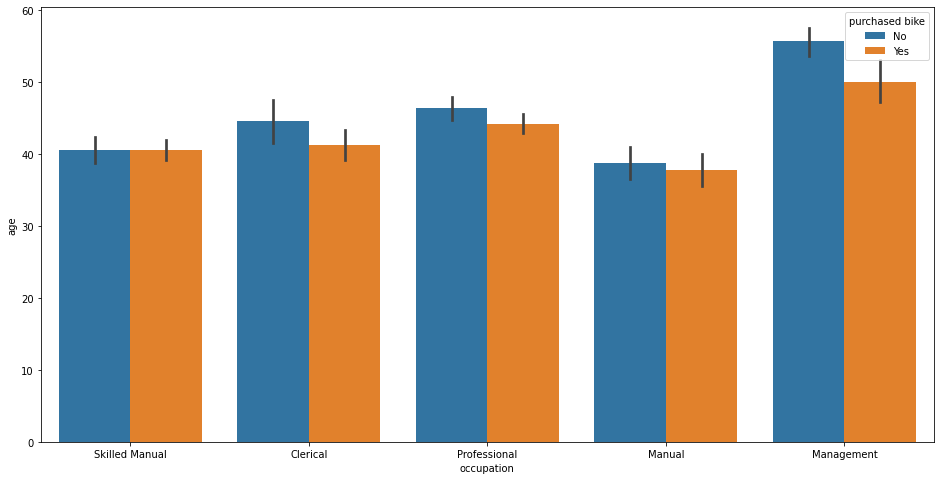

In [18]:
sns.barplot(data=df, x="occupation", y="age", hue="purchased bike")

# Task 2: histogram

## All children

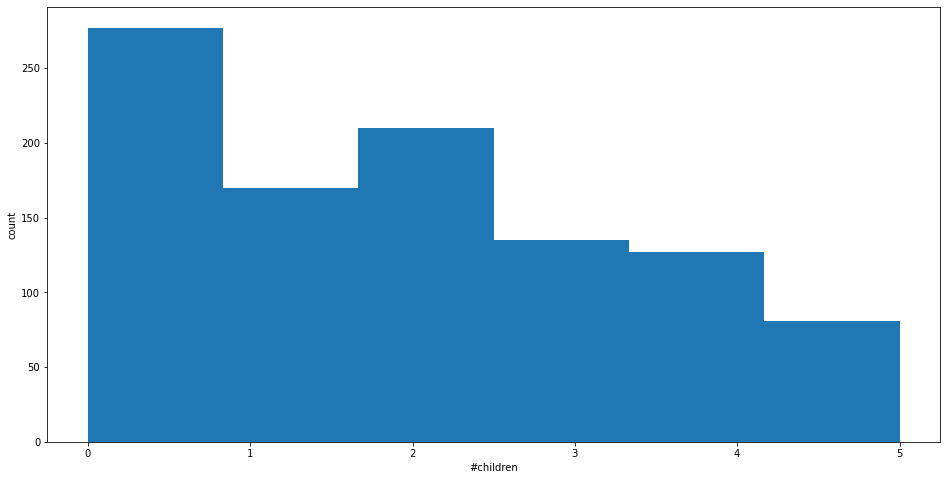

In [19]:
plt.hist(df["children"], bins=df["children"].nunique())
plt.xlabel("#children")
plt.ylabel("count")
plt.show()

## Childern by purchase decision

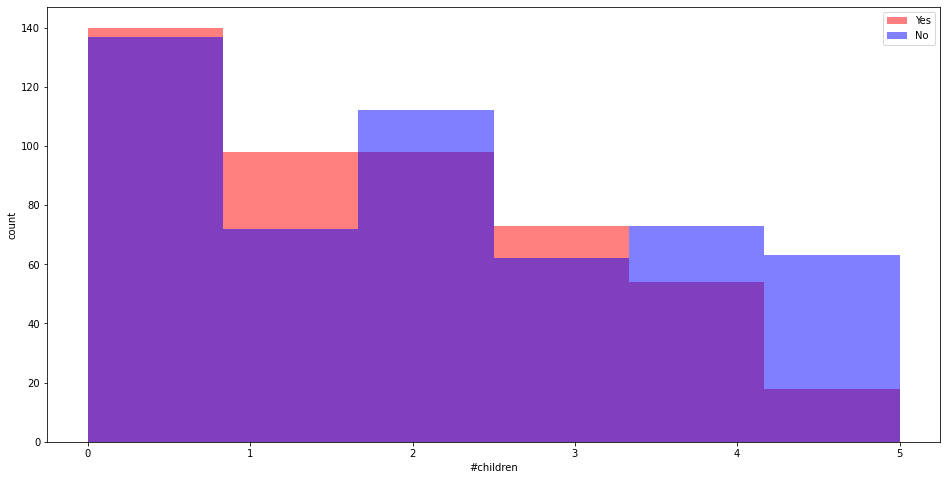

In [20]:
plt.hist(df["children"][df["purchased bike"]=="Yes"], bins=df["children"].nunique(), alpha=0.5, label="Yes", color="red")
plt.hist(df["children"][df["purchased bike"]=="No"], bins=df["children"].nunique(), alpha=0.5, label="No", color="blue")
plt.xlabel("#children")
plt.ylabel("count")
plt.legend()
plt.show()

# Task 3: boxplot

## Income

<AxesSubplot:ylabel='income'>

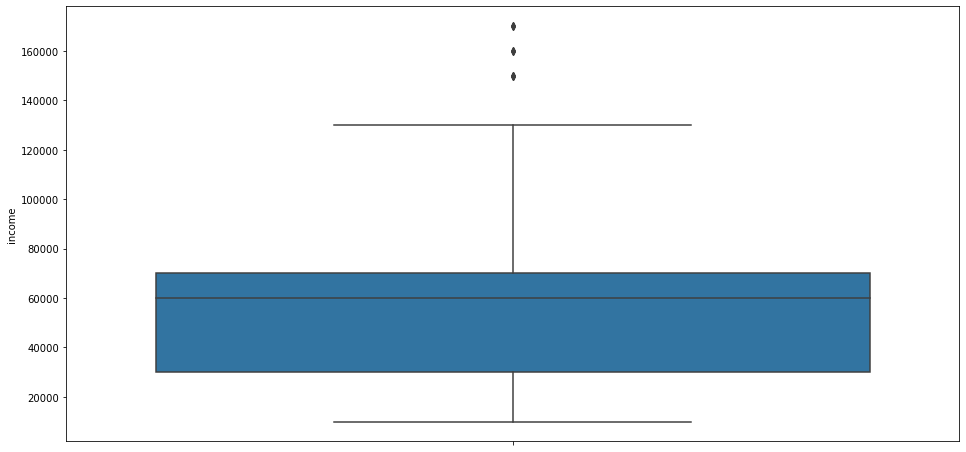

In [21]:
sns.boxplot(data=df, y="income")
# outliers at df["income"] more than ~14000

## Income by education

<AxesSubplot:xlabel='education', ylabel='income'>

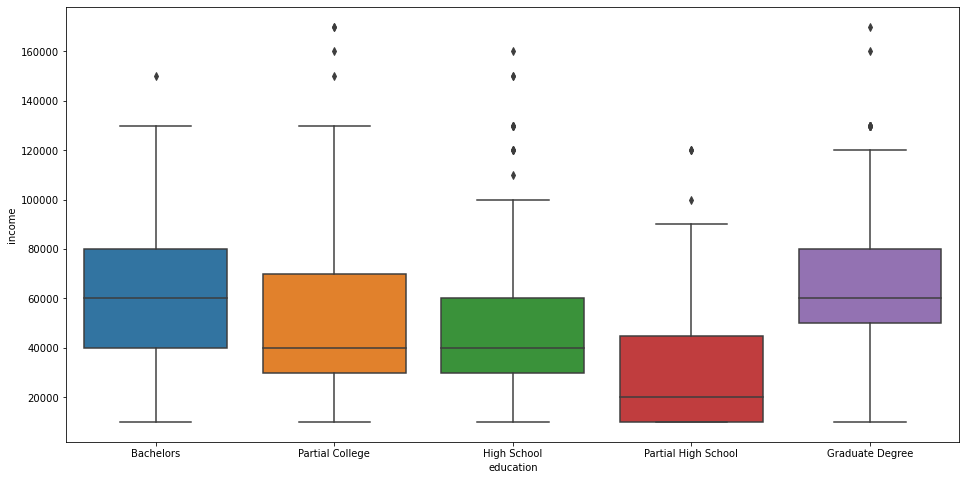

In [22]:
sns.boxplot(data=df, x="education", y="income")
# outliers at df["income"] more than
# ~14000 for Bachelors and Partial College
# ~12500 for Graduate Degree
# ~10000 for High School
# ~9000 for Partial High School

# Task 4: scatter

## Income & Age

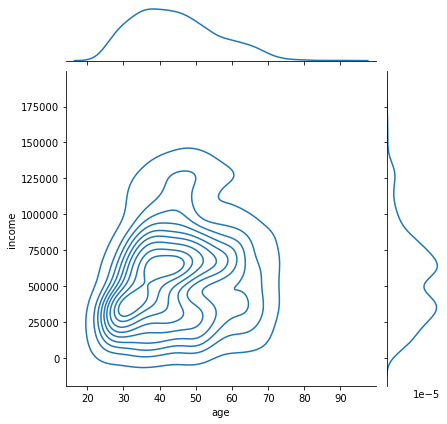

In [23]:
sns.jointplot(data=df, x="age", y="income", kind="kde")
# some pos rel

## Cars & Childer

[Text(0.5, 51.0, '#cars'), Text(123.0, 0.5, '#children')]

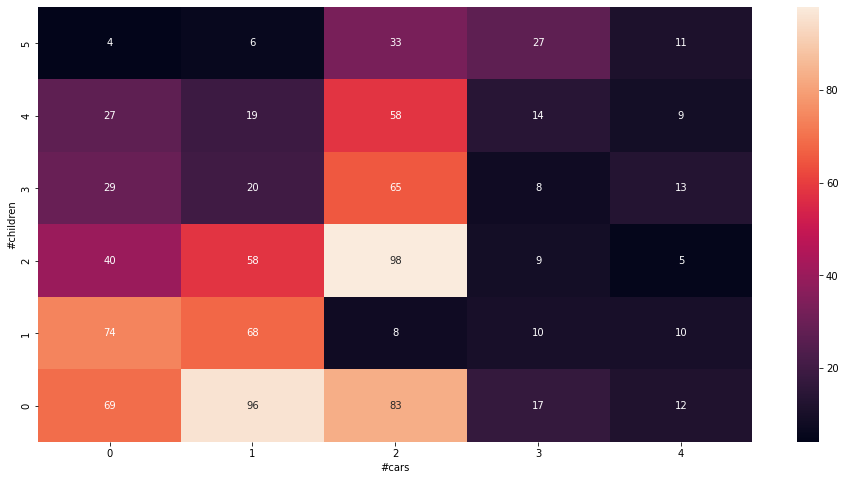

In [24]:
temp = np.zeros((df["children"].nunique(), df["cars"].nunique()))
for index, row in df.iterrows():
    temp[row["children"], row["cars"]] += 1

sns.heatmap(temp[::-1], yticklabels=list(range(temp.shape[0] - 1, -1, -1)), annot=True).set(xlabel="#cars", ylabel="#children")
# some pos rel